This notebook performs an in-depth analysis of the ten most important geo-clusters identified from the taxi dataset. It focuses on exploring patterns, demand distribution, and temporal trends within these key clusters to support demand prediction and logistic planning. The analysis includes data loading, visualization, and feature extraction specific to each cluster.

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Analysing the Geo-Clusters

## 1. Loading the 10 geo-cluster-datasets

In [2]:
data_folder = "../data/interim"

# Dictionary  for Saving the Dataframes. The key is the number of the cluster
cluster_dfs = {}

for i in range(10):
    file_path = os.path.join(data_folder, f"cluster_{i}.pkl")
    cluster_dfs[i] = pd.read_pickle(file_path)

In [3]:
# Taking a look at the lenght of the clusters
for cluster_id, df in cluster_dfs.items():
    print(f"Cluster {cluster_id} has {len(df)} rows")

Cluster 0 has 935912 rows
Cluster 1 has 156573 rows
Cluster 2 has 585577 rows
Cluster 3 has 44512 rows
Cluster 4 has 133041 rows
Cluster 5 has 271474 rows
Cluster 6 has 102472 rows
Cluster 7 has 1490530 rows
Cluster 8 has 564776 rows
Cluster 9 has 206754 rows


In [4]:
# Making sure we are working with the correct datatypes
print(cluster_dfs[0].dtypes)


messagetimestamp    datetime64[ns]
Lat                        float64
Lon                        float64
Base                        object
geo_cluster                   int8
dominant_borough            object
temperature_c              Float64
precipitation_mm           Float64
dtype: object


In [5]:
cluster_dfs[0].head(3)

,messagetimestamp,Lat,Lon,Base,geo_cluster,dominant_borough,temperature_c,precipitation_mm
3,2014-04-01 00:01:00,40.7355,-73.9966,B02617,0,Manhattan,11.7,0.0
11,2014-04-01 00:06:00,40.7213,-74.0326,B02682,0,Manhattan,11.7,0.0
14,2014-04-01 00:07:00,40.7193,-74.0041,B02682,0,Manhattan,11.7,0.0


## 2. Analysing the hourly, weekly and total demand for taxi rides in the 10 geo-clusters

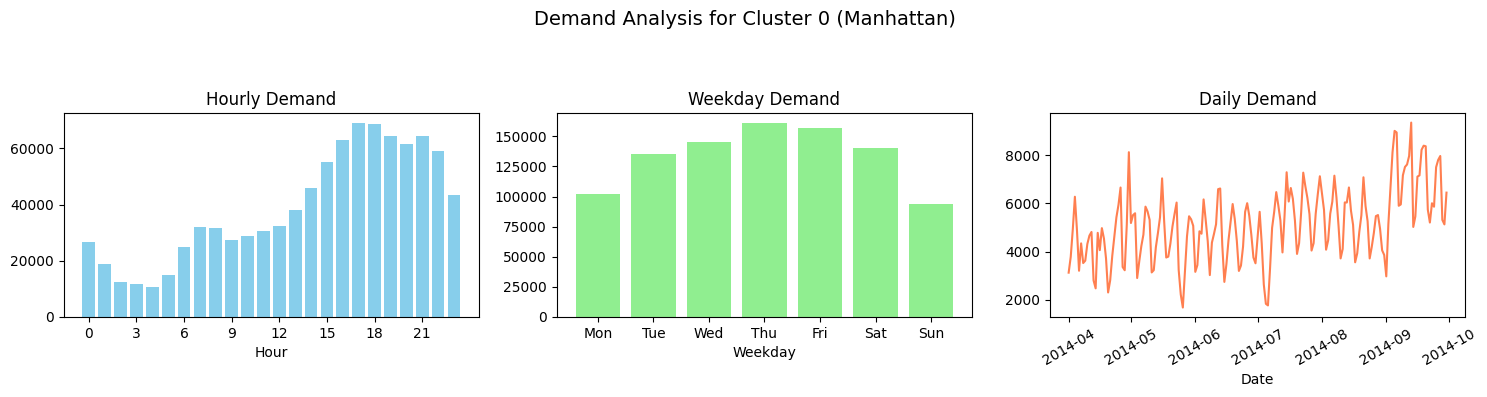

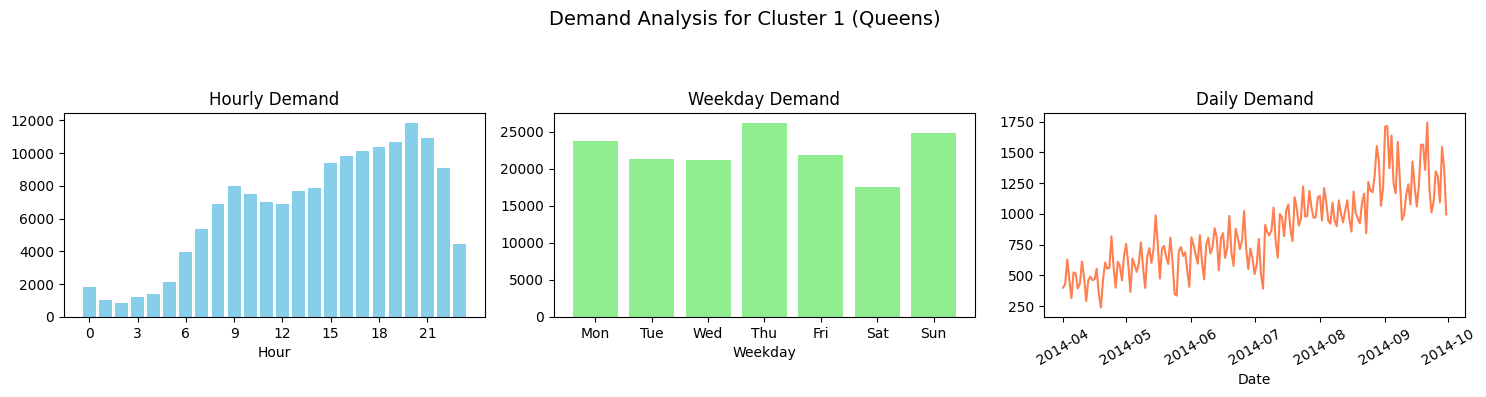

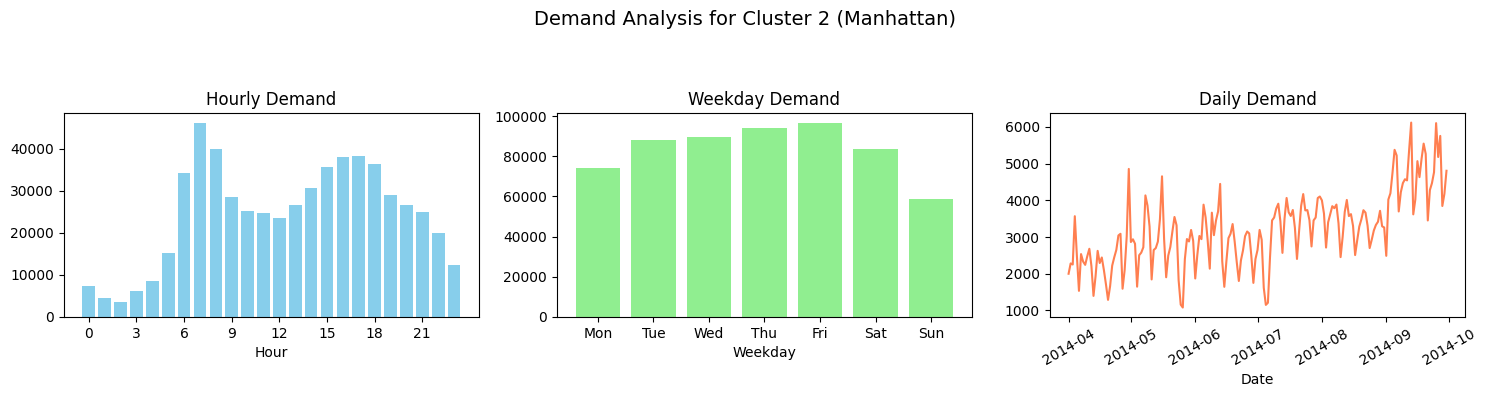

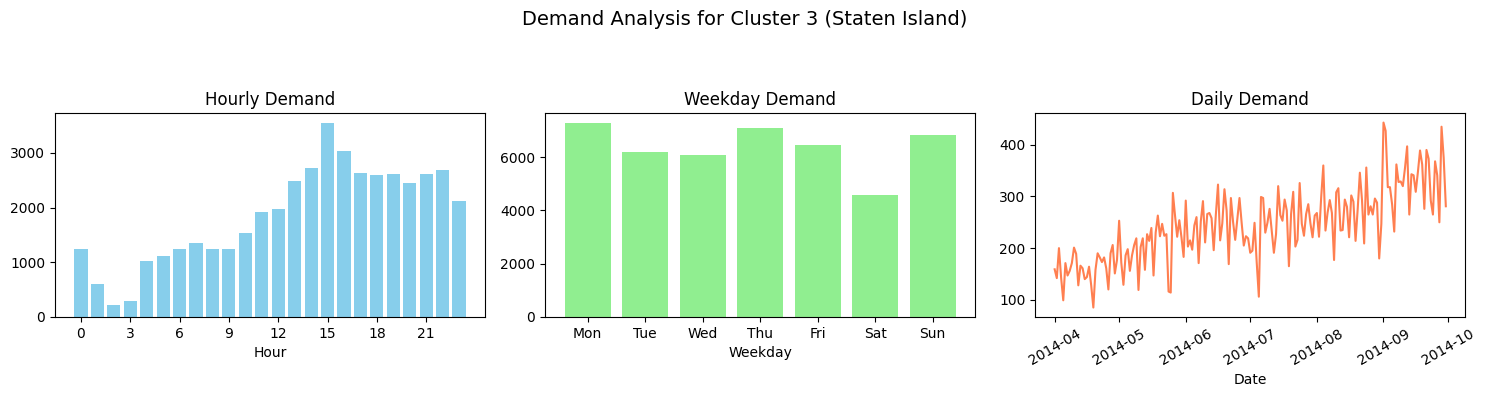

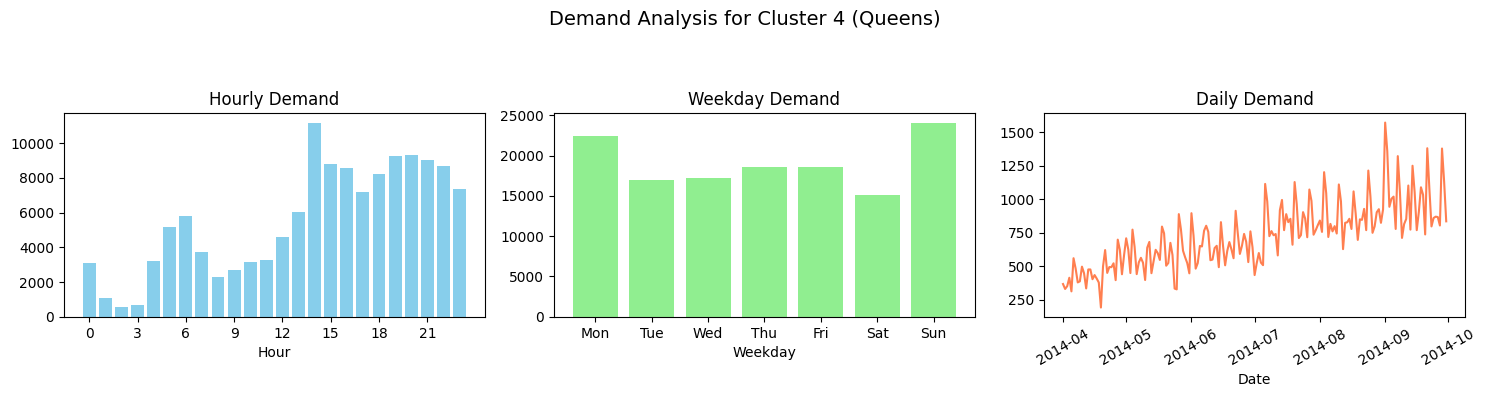

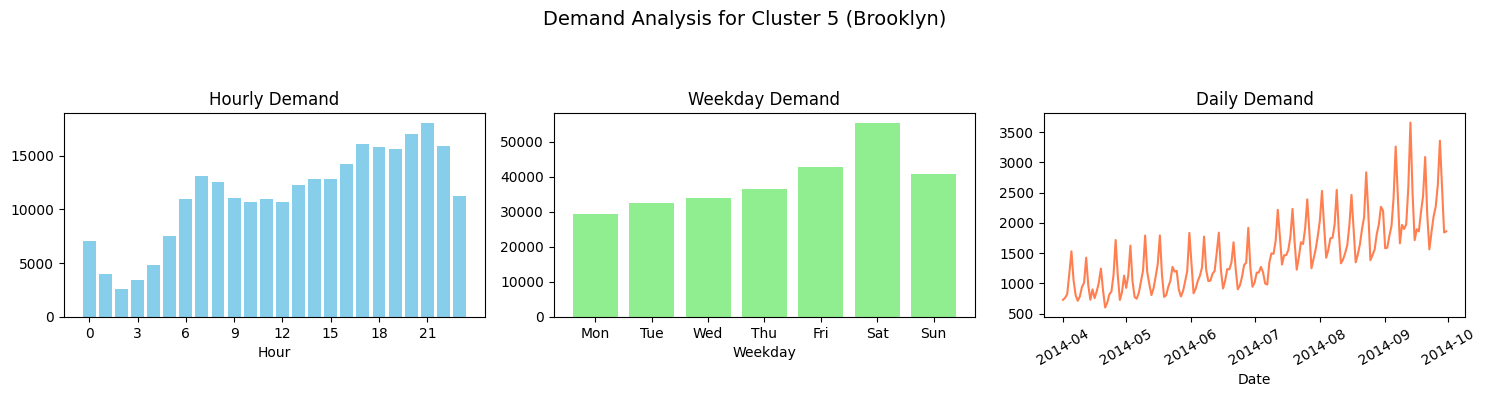

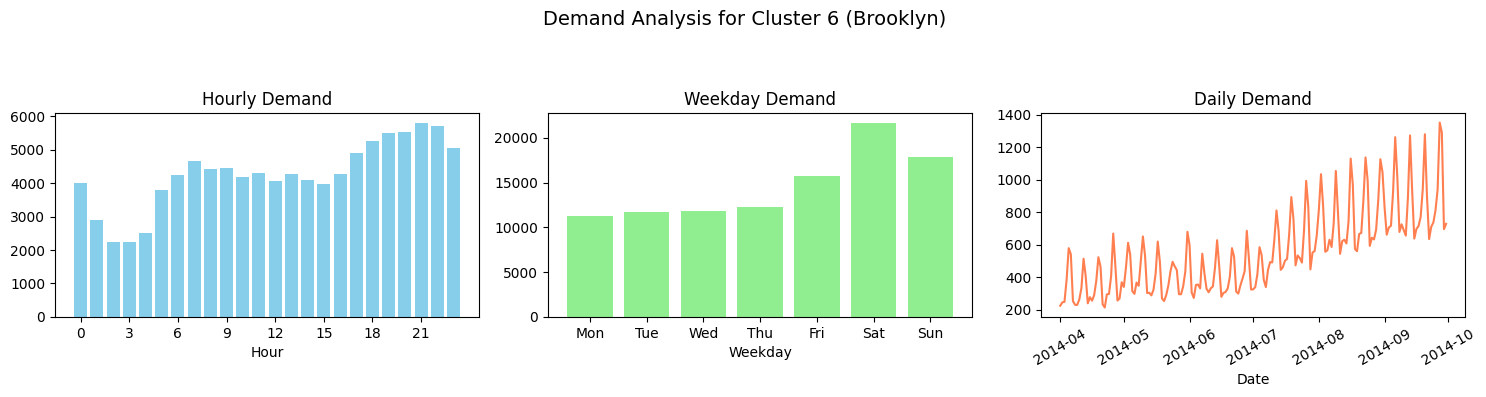

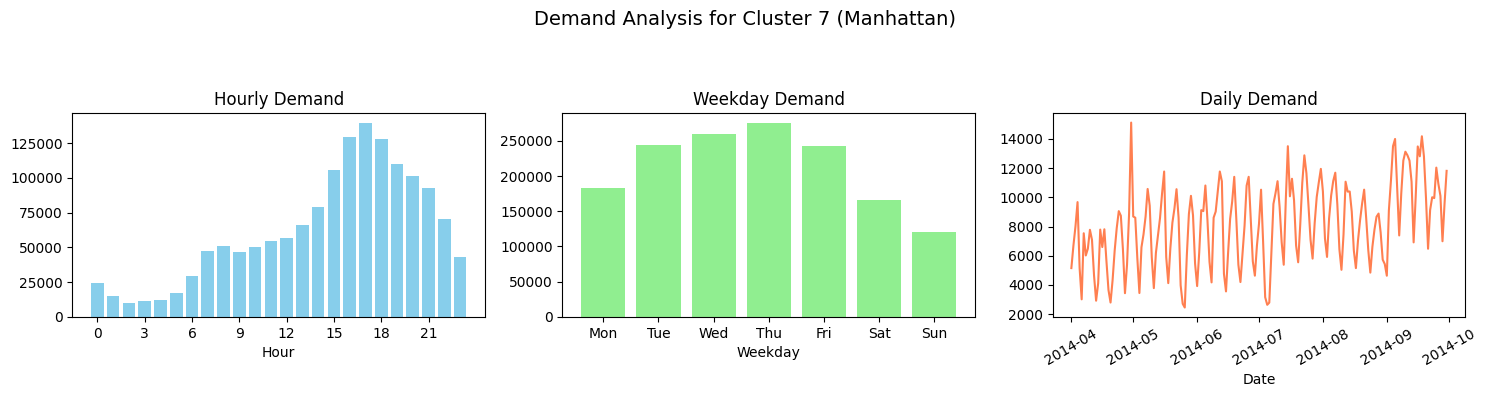

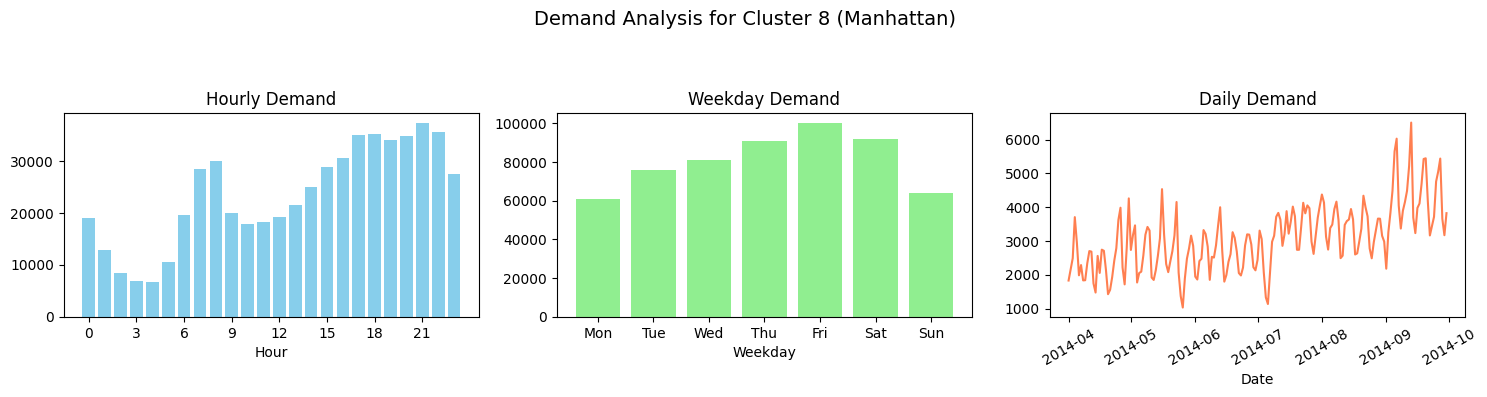

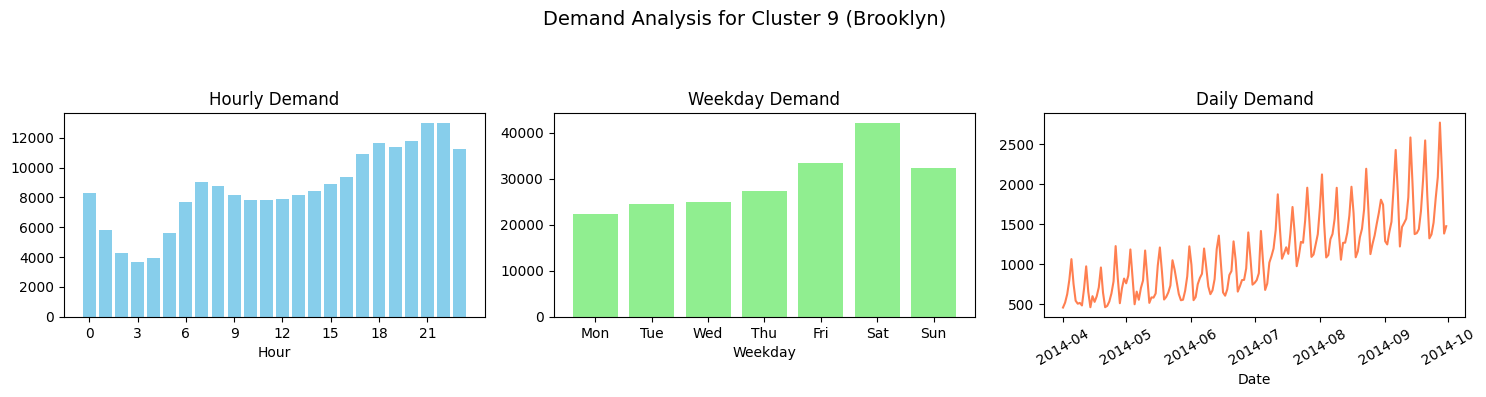

In [6]:
# Analysing the hourly, weekly and total demand for taxi rides in the geo-clusters
for cluster_id, df in cluster_dfs.items():
    df['messagetimestamp'] = pd.to_datetime(df['messagetimestamp'])
    df['hour'] = df['messagetimestamp'].dt.hour
    df['weekday'] = df['messagetimestamp'].dt.weekday
    df['date'] = df['messagetimestamp'].dt.date

    demand_by_hour = df.groupby('hour').size()
    demand_by_weekday = df.groupby('weekday').size()
    demand_by_date = df.groupby('date').size()

    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    dominant_borough = df['dominant_borough'].iloc[0]
    fig.suptitle(f'Demand Analysis for Cluster {cluster_id} ({dominant_borough})', fontsize=14)


    axs[0].bar(demand_by_hour.index, demand_by_hour.values, color='skyblue')
    axs[0].set_title('Hourly Demand')
    axs[0].set_xticks(range(0,24,3))
    axs[0].set_xlabel('Hour')

    weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    axs[1].bar(demand_by_weekday.index, demand_by_weekday.values, color='lightgreen')
    axs[1].set_title('Weekday Demand')
    axs[1].set_xticks(range(7))
    axs[1].set_xticklabels(weekday_labels)
    axs[1].set_xlabel('Weekday')

    axs[2].plot(demand_by_date.index, demand_by_date.values, color='coral')
    axs[2].set_title('Daily Demand')
    axs[2].tick_params(axis='x', rotation=30)
    axs[2].set_xlabel('Date')

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

In [7]:
# Summarize each cluster’s ride demand by hour, weekday, and date, then print peak times and total rides.

for cluster_id, df in cluster_dfs.items():
    df['messagetimestamp'] = pd.to_datetime(df['messagetimestamp'])
    df['hour'] = df['messagetimestamp'].dt.hour
    df['weekday'] = df['messagetimestamp'].dt.weekday
    df['date'] = df['messagetimestamp'].dt.date
    dominant_borough = df['dominant_borough'].iloc[0]

    demand_by_hour = df.groupby('hour').size()
    demand_by_weekday = df.groupby('weekday').size()
    demand_by_date = df.groupby('date').size()

    print(f"\n--- Cluster {cluster_id} ({dominant_borough}) ---")
    print(f"Peak Hour(s): {demand_by_hour[demand_by_hour == demand_by_hour.max()].index.tolist()} with {demand_by_hour.max()} rides")
    print(f"Peak Weekday(s): {[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][i] for i in demand_by_weekday[demand_by_weekday == demand_by_weekday.max()].index.tolist()]} with {demand_by_weekday.max()} rides")
    print(f"Date with Highest Demand: {demand_by_date.idxmax()} with {demand_by_date.max()} rides")
    print(f"Total Rides: {len(df)}")


--- Cluster 0 (Manhattan) ---
Peak Hour(s): [17] with 69074 rides
Peak Weekday(s): ['Thu'] with 161091 rides
Date with Highest Demand: 2014-09-13 with 9359 rides
Total Rides: 935912

--- Cluster 1 (Queens) ---
Peak Hour(s): [20] with 11843 rides
Peak Weekday(s): ['Thu'] with 26151 rides
Date with Highest Demand: 2014-09-21 with 1742 rides
Total Rides: 156573

--- Cluster 2 (Manhattan) ---
Peak Hour(s): [7] with 46089 rides
Peak Weekday(s): ['Fri'] with 96638 rides
Date with Highest Demand: 2014-09-13 with 6116 rides
Total Rides: 585577

--- Cluster 3 (Staten Island) ---
Peak Hour(s): [15] with 3547 rides
Peak Weekday(s): ['Mon'] with 7280 rides
Date with Highest Demand: 2014-09-01 with 443 rides
Total Rides: 44512

--- Cluster 4 (Queens) ---
Peak Hour(s): [14] with 11162 rides
Peak Weekday(s): ['Sun'] with 24047 rides
Date with Highest Demand: 2014-09-01 with 1574 rides
Total Rides: 133041

--- Cluster 5 (Brooklyn) ---
Peak Hour(s): [21] with 18059 rides
Peak Weekday(s): ['Sat'] with 

##### Key Findings:

#### Cluster 0 (Manhattan)
- Classic commuter behavior with peak demand at 5 PM
- Thursday shows highest activity – strong weekday commuting
- Demand spike on Saturday, Sept 13 – likely due to events or tourism
- High-volume cluster with nearly 1 million rides

##### Cluster 1 (Queens)
- Evening peak at 8 PM – suggests leisure or return-home travel
- Thursday is the busiest weekday
- High demand on Sunday, Sept 21 – possibly due to events or weekend travel
- Overall lower volume compared to Manhattan

##### Cluster 2 (Manhattan)
- Morning-focused cluster with 7 AM peak – typical inbound commuter pattern
- Friday is the busiest day – end-of-week work travel
- High rides on Saturday, Sept 13 – potential nightlife or tourism
- Reflects strong commuter activity

##### Cluster 3 (Staten Island)
- Low-volume cluster with peak in the afternoon and on Mondays
- May reflect local errands or school-related travel
- Top date is Sept 1 (Labor Day, Monday) – indicates holiday traffic

##### Cluster 4 (Queens)
- Strong weekend activity with demand peaking on Sundays and in mid-afternoon
- Likely reflects non-work travel like family visits or leisure
- Sept 1 (Labor Day) stands out as a major travel date

##### Cluster 5 (Brooklyn)
- Classic nightlife pattern with late evening and Saturday peaks
- Highest demand on Sept 13 (Saturday) – strong weekend activity
- Likely centered around nightlife or entertainment zones

##### Cluster 6 (Brooklyn)
- Similar to Cluster 5: late evening peaks on Saturdays
- Leisure-oriented traffic (bars, restaurants, events)
- Lower volume suggests a smaller or residential nightlife area

##### Cluster 7 (Manhattan)
- Busiest cluster overall – classic central business district behavior
- High weekday demand, especially Thursday afternoons
- Huge spike on April 30 – possibly a seasonal or major event
- Core taxi zone in Manhattan

##### Cluster 8 (Manhattan)
- High evening and weekend activity – 9 PM peak, Fridays busiest
- Strong nightlife and social travel behavior
- Sept 13 (Saturday) shows high demand – supports entertainment usage
- Likely includes popular nightlife or event areas

##### Cluster 9 (Queens)
- Weekend and afternoon-heavy demand, Sunday busiest
- Early afternoon peak – possibly family outings, church, or shopping
- Top date is Sept 21 (Sunday) – confirms leisure-oriented usage
- Lower volume suggests more residential zone

## 3. Trend analysis for the different geo-clusters


--- Cluster 0 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     55.24
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           4.09e-12
Time:                        09:03:19   Log-Likelihood:                -1574.3
No. Observations:                 183   AIC:                             3153.
Df Residuals:                     181   BIC:                             3159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

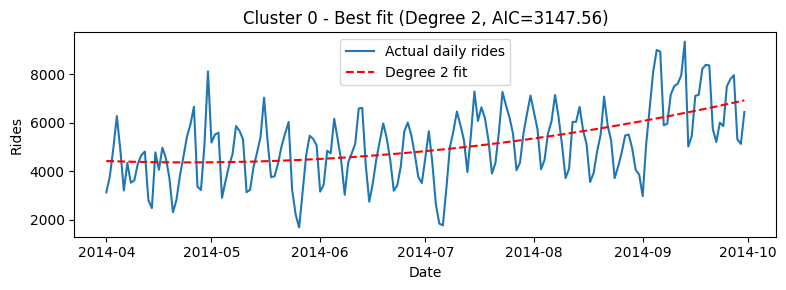


--- Cluster 1 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     483.9
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           5.01e-53
Time:                        09:03:19   Log-Likelihood:                -1198.0
No. Observations:                 183   AIC:                             2400.
Df Residuals:                     181   BIC:                             2407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

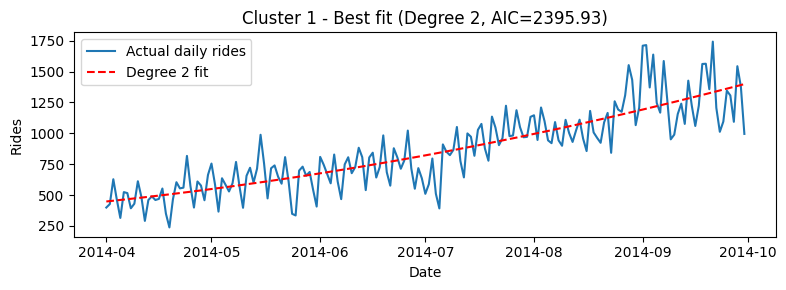


--- Cluster 2 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     139.1
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.48e-24
Time:                        09:03:19   Log-Likelihood:                -1471.4
No. Observations:                 183   AIC:                             2947.
Df Residuals:                     181   BIC:                             2953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

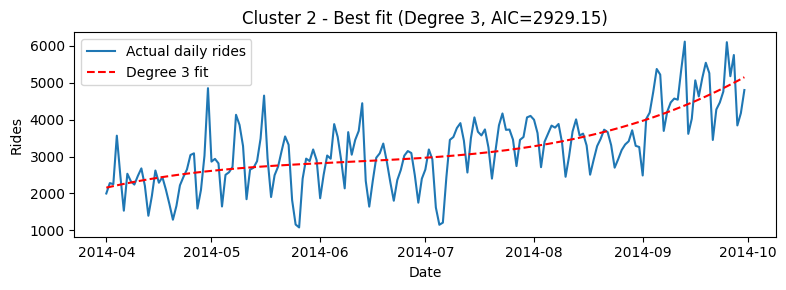


--- Cluster 3 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     231.8
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.13e-34
Time:                        09:03:19   Log-Likelihood:                -962.79
No. Observations:                 183   AIC:                             1930.
Df Residuals:                     181   BIC:                             1936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

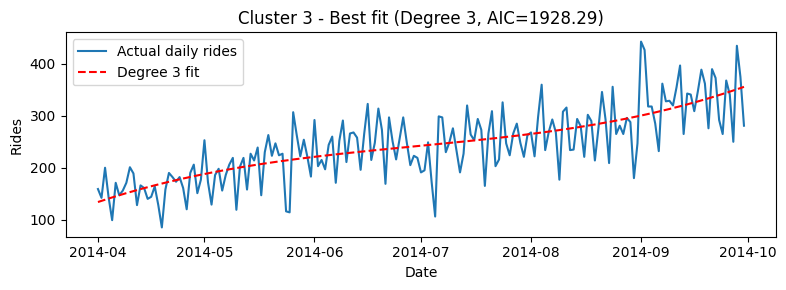


--- Cluster 4 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     256.3
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.63e-36
Time:                        09:03:19   Log-Likelihood:                -1182.4
No. Observations:                 183   AIC:                             2369.
Df Residuals:                     181   BIC:                             2375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

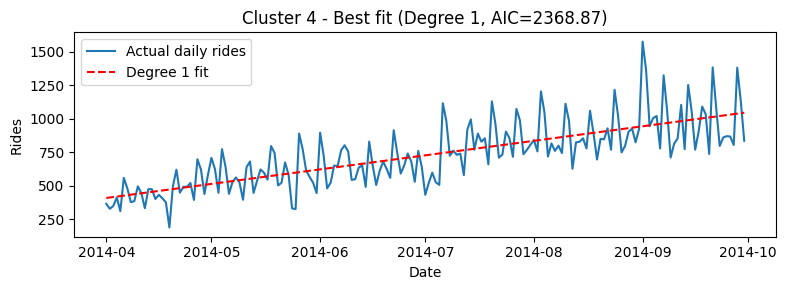


--- Cluster 5 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     252.9
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.33e-36
Time:                        09:03:20   Log-Likelihood:                -1341.5
No. Observations:                 183   AIC:                             2687.
Df Residuals:                     181   BIC:                             2693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

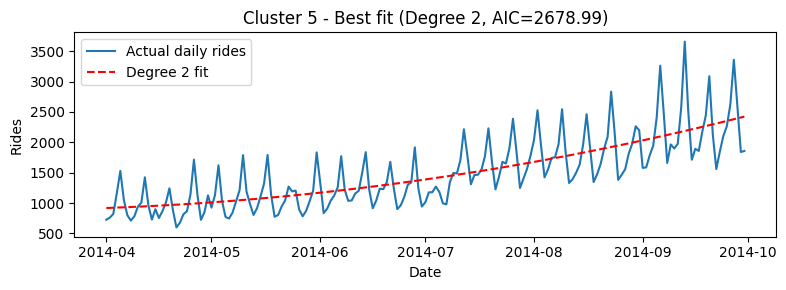


--- Cluster 6 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     229.3
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           5.34e-34
Time:                        09:03:20   Log-Likelihood:                -1196.8
No. Observations:                 183   AIC:                             2398.
Df Residuals:                     181   BIC:                             2404.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

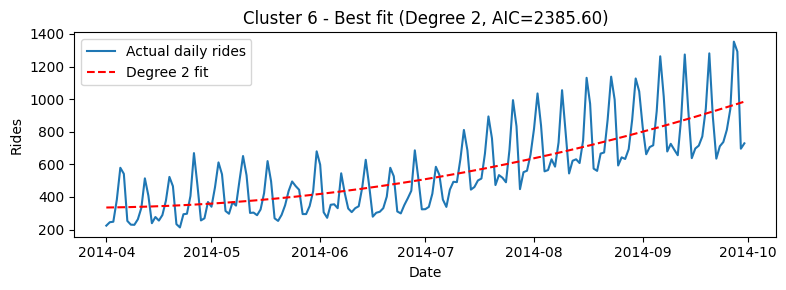


--- Cluster 7 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     39.59
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           2.29e-09
Time:                        09:03:20   Log-Likelihood:                -1693.1
No. Observations:                 183   AIC:                             3390.
Df Residuals:                     181   BIC:                             3397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

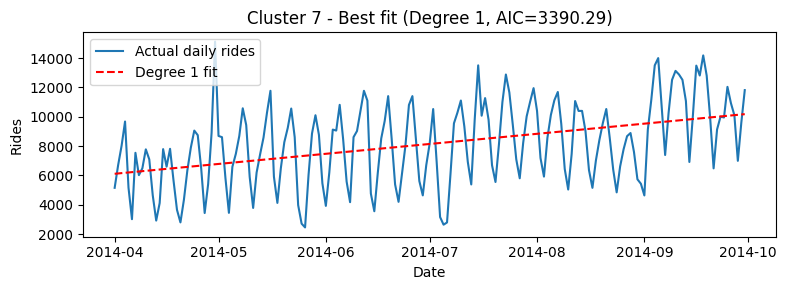


--- Cluster 8 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.75e-20
Time:                        09:03:20   Log-Likelihood:                -1473.4
No. Observations:                 183   AIC:                             2951.
Df Residuals:                     181   BIC:                             2957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

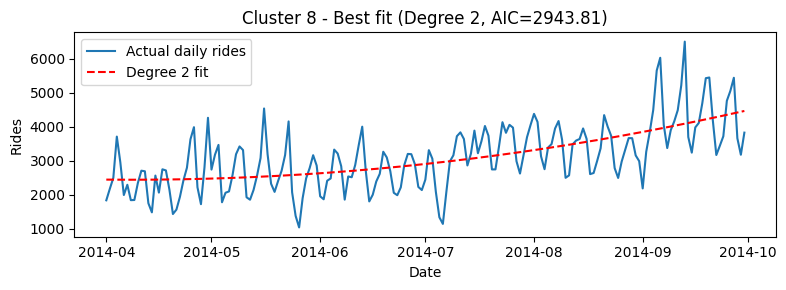


--- Cluster 9 ---

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     318.0
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.03e-41
Time:                        09:03:20   Log-Likelihood:                -1298.4
No. Observations:                 183   AIC:                             2601.
Df Residuals:                     181   BIC:                             2607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

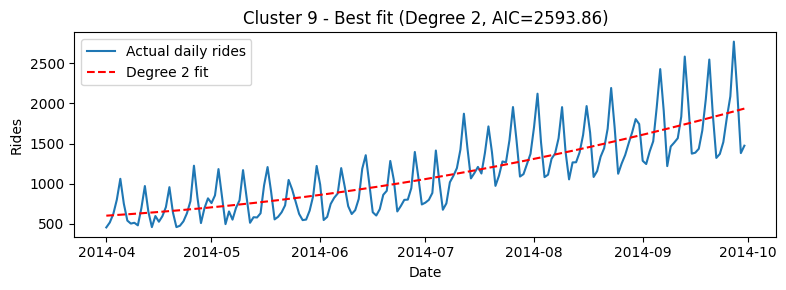

In [8]:
# Fit and compare linear, quadratic, and cubic trends on each cluster’s daily rides,
# select the best model where the highest-degree term is statistically significant (p < 0.05) based on AIC,
# if none are significant, select the model with the lowest AIC anyway,
# and plot the raw counts against the chosen polynomial curve.

results = []

for cluster_id, df in cluster_dfs.items():
    print(f"\n--- Cluster {cluster_id} ---")

    # 1. Aggregate daily rides
    df['messagetimestamp'] = pd.to_datetime(df['messagetimestamp'])
    df['date'] = df['messagetimestamp'].dt.date
    daily = df.groupby('date').size().reset_index(name='rides')
    daily['date'] = pd.to_datetime(daily['date'])
    daily['t'] = (daily['date'] - daily['date'].min()).dt.days.values

    X = daily[['t']].values
    y = daily['rides'].values

    candidate_models = []

    for deg in (1, 2, 3):
        # Generate polynomial features
        poly = PolynomialFeatures(degree=deg, include_bias=False)
        X_poly = poly.fit_transform(X)

        # Add constant for intercept
        X_sm = sm.add_constant(X_poly)

        # Fit OLS regression model
        model = sm.OLS(y, X_sm).fit()

        # Extract p-value of the highest degree term (last coefficient except intercept)
        highest_deg_pval = model.pvalues[-1]

        # Print regression summary
        print(f"\nDegree {deg} model summary:")
        print(model.summary())

        candidate_models.append({
            'degree': deg,
            'model': model,
            'aic': model.aic,
            'significant_highest': highest_deg_pval < 0.05
        })

    # Filter models where highest degree term is significant
    sig_models = [m for m in candidate_models if m['significant_highest']]

    if sig_models:
        # Choose best model by lowest AIC among significant highest-degree models
        best_model = min(sig_models, key=lambda x: x['aic'])
    else:
        # If none have significant highest-degree term, choose model with lowest AIC anyway
        best_model = min(candidate_models, key=lambda x: x['aic'])

    deg = best_model['degree']
    model = best_model['model']
    print(f"\nBest model chosen for cluster {cluster_id}: Degree {deg} "
          f"(AIC={model.aic:.2f}, significant_highest={best_model['significant_highest']})")

    # Predict values for plotting
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_sm = sm.add_constant(X_poly)
    y_pred = model.predict(X_sm)

    # Plot actual vs predicted rides
    plt.figure(figsize=(8, 3))
    plt.plot(daily['date'], y, label='Actual daily rides')
    plt.plot(daily['date'], y_pred, 'r--', label=f'Degree {deg} fit')
    plt.title(f'Cluster {cluster_id} - Best fit (Degree {deg}, AIC={model.aic:.2f})')
    plt.xlabel('Date')
    plt.ylabel('Rides')
    plt.legend()
    plt.tight_layout()
    plt.show()